## Augmented Dickey-Fuller Test for Stationarity

< About Augmented Dickey-Fuller Test >

The Augmented Dickey-Fuller (ADF) test is a statistical test commonly used to check for stationarity in a time series. 

- It tests the null hypothesis that a unit root is present in the series, which indicates non-stationarity. 
- If the p-value obtained from the test is less than a certain threshold (e.g., 0.05), we can reject the null hypothesis and conclude that the series is stationary.

Performing this test to know if the data we are working on is stationary or not is very important before proceeding to building forecasting models because this is a key assumption in lot of predictive models like ARIMA model.

For more info, visit 

(1) https://www.askpython.com/python/examples/augmented-dickey-fuller-test-time-series \
(2) https://medium.com/@ritusantra/tests-for-stationarity-in-time-series-dickey-fuller-test-augmented-dickey-fuller-adf-test-d2e92e214360 \
(3) https://blog.quantinsti.com/augmented-dickey-fuller-adf-test-for-a-pairs-trading-strategy/


#### Airline Passengers Data

In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# statsmodels seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

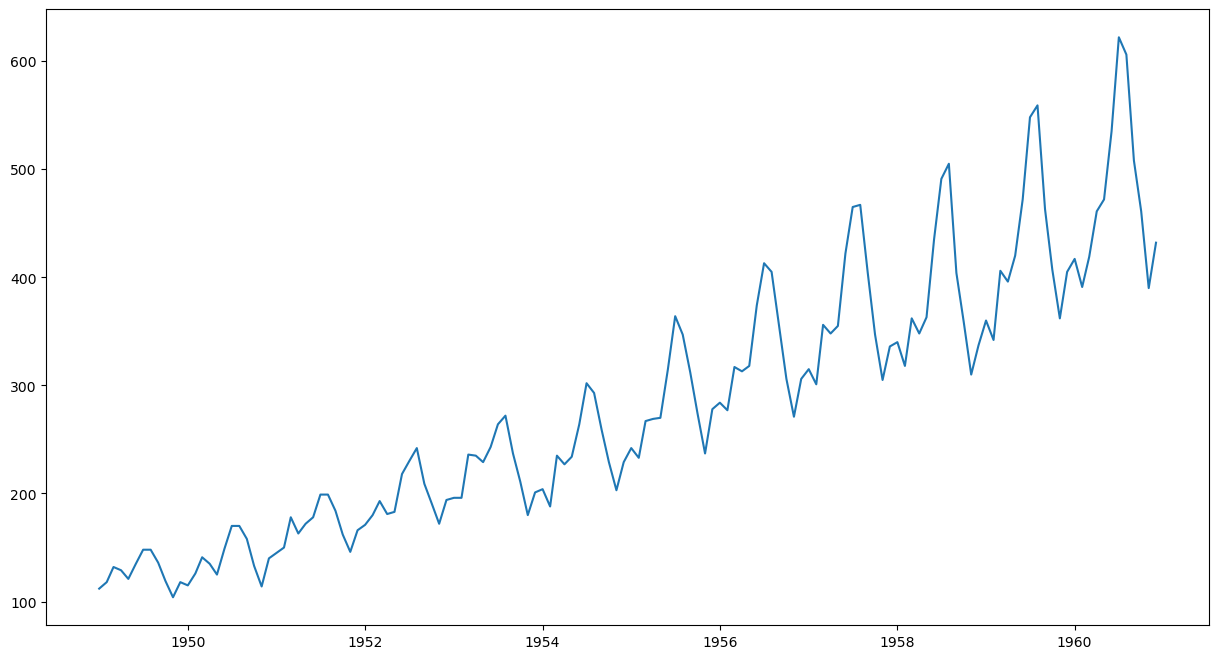

In [4]:
# import Airline datasets

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url,index_col=0, header = 0, parse_dates=['Month'])

# plot the Airline dataset grapgh
plt.figure(figsize = (15,8))
plt.plot(df)

#### Augmented Dickey-Fuller Test 

In [8]:
# Augmented Dickey-Fuller Test 
from statsmodels.tsa.stattools import adfuller

adftest = adfuller(df['Passengers'], autolag='AIC', regression='ct')
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")


ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -2.1007818138446694
P-Value: 0.5456589343124553
Number of lags: 13
Number of observations: 130
Critical Values: {'1%': -4.030152423759672, '5%': -3.444817634956759, '10%': -3.1471816659080565}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


#### Stationarize the data


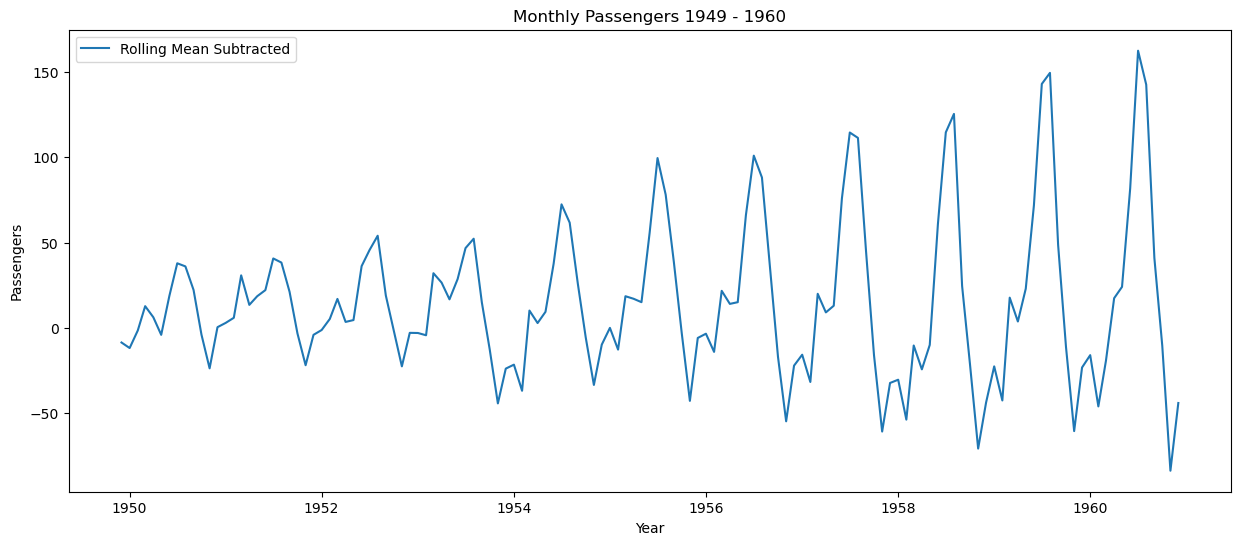

In [11]:
# rolling mean for passengers data

df['Passengers_rolling_mean'] = df['Passengers'].rolling(12).mean()
df['Passengers_rolling_std'] = df['Passengers'].rolling(12).std()
df['Passengers_rolling_mean_subtracted'] = df['Passengers'] - df['Passengers_rolling_mean']

# check the stationary using rolling mean

plt.figure(figsize = (15,6))
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Monthly Passengers 1949 - 1960', fontsize = 12)
plt.plot(df['Passengers_rolling_mean_subtracted'], label = 'Rolling Mean Subtracted')
plt.legend()
plt.show()

In [14]:
# Augmented Dickey-Fuller Test 
from statsmodels.tsa.stattools import adfuller

adftest = adfuller(df['Passengers_rolling_mean_subtracted'].dropna(), autolag='AIC', regression='ct')
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")


ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -3.5006831050814124
P-Value: 0.03931797424345626
Number of lags: 13
Number of observations: 119
Critical Values: {'1%': -4.036933565633866, '5%': -3.4480491338265407, '10%': -3.1490681814297643}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


#### Rainfall data (kemaman station)

In [3]:
# read datasets

df = pd.read_csv('data01.csv', parse_dates = ['time_start'] )
df.head()

# data preprocessing
# 0600011RF : station Kemaman

cols = ['time_start', '0600011RF']
df_kemaman = df[cols]
df_kemaman.set_index('time_start',inplace = True)
df_kemaman.rename(columns = {'0600011RF':'Precipitation'}, inplace = True)

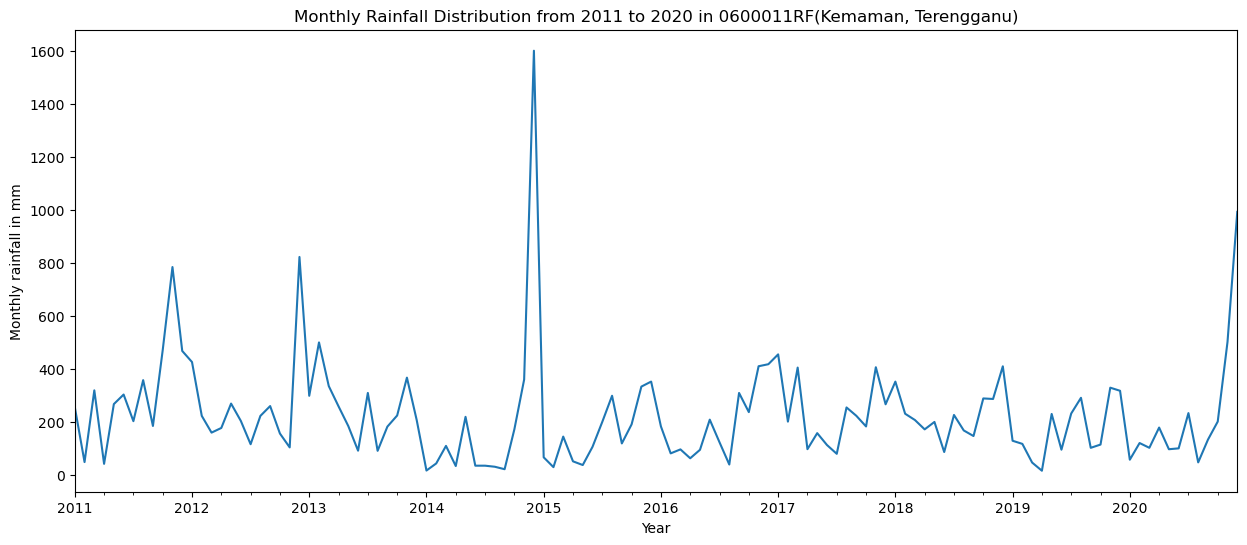

In [9]:
# rainfall by month
monthly_rain = df_kemaman['Precipitation'].resample('MS').sum()
df_monthly = pd.DataFrame(monthly_rain)

# plot graph
monthly_rain.plot(figsize=(15, 6))
plt.xlabel('Year')
plt.ylabel('Monthly rainfall in mm')
plt.title('Monthly Rainfall Distribution from 2011 to 2020 in 0600011RF(Kemaman, Terengganu)', fontsize = 12)
plt.show()

In [10]:
# Augmented Dickey-Fuller Test 
from statsmodels.tsa.stattools import adfuller

adftest = adfuller(df_monthly['Precipitation'].dropna(), autolag='AIC', regression='ct')
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")


ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -7.860862862679032
P-Value: 1.4985637911901402e-10
Number of lags: 0
Number of observations: 119
Critical Values: {'1%': -4.036933565633866, '5%': -3.4480491338265407, '10%': -3.1490681814297643}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary
